In [6]:
from lib.adapter import get_protossdml_encoder
from lib.wsi_analysis.wsi_analyzer import WSIAnalyzer


In [7]:
model, transform = get_protossdml_encoder("./checkpoint_c16.pth")

# Use demo class
analyzer = WSIAnalyzer(model=model, transform=transform, device="cuda")

WSI Analyser ready to accept slides.


33,167 patches of size 224x224 generated from /store2/travail/data/CAMELYON16/images/test_071.tif at resolution power 20
1,845 patches within anomalous regions


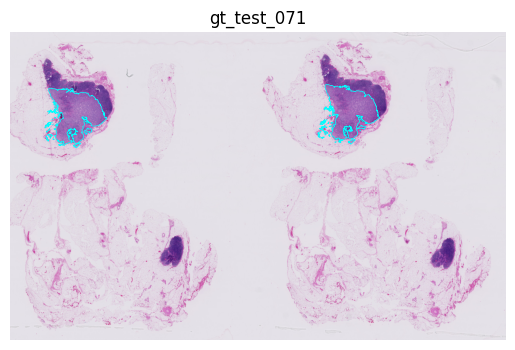

In [8]:
# Set test WSI from CAMELYON16
CAMELYON_PATH = "/store2/travail/data/CAMELYON16"
name = "test_071"
analyzer.set_wsi(wsi_path=f"{CAMELYON_PATH}/images/{name}.tif",
                patch_size=224,
                resolution=20,
                annotations_paths=[f"{CAMELYON_PATH}/annotations/{name}.xml"],
                annotations_type="camelyon_xml",
)

# Show thumbnail image
analyzer.generate_thumbnail_img(include_annotations=True)

In [9]:
# Project all tissue patches to encoder representation space
analyzer.preprocess()
# Load support set from provided file (support set 0 from low-data zero shot evaluation).
# This support set was generated using CAMELYON16 these tumor slides: [015, 066, 047, 031, 101, 049]
analyzer.load_support_set_from_file("./embeddings_tumor_0.npz")
# Compute cosine similarity between prototype and individual patch embeddings
analyzer.analyse().show()

Projecting patches to texture space:   0%|          | 0/260 [00:00<?, ?it/s]

Projecting patches to texture space: 100%|██████████| 260/260 [00:31<00:00,  8.37it/s]


GENERATING ADJACENCY GRAPH


|2025-05-12|16:59:57.599| [WARNING] /usagers/gafaua/miniconda3/envs/placenta/lib/python3.11/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.




Generated graph with 66,334 nodes and 137,636 edges
Queries shape: (6, 384)


0.8155783726847282 1.5809910596021153


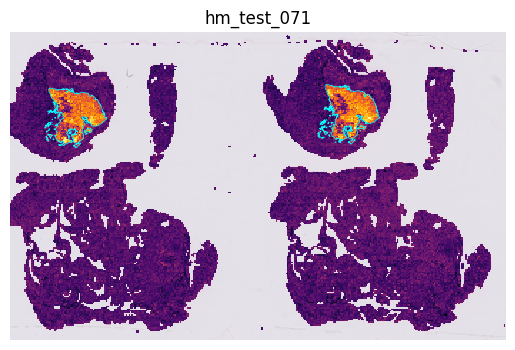

In [10]:
# Show result image
analyzer.generate_heatmap(propagated=False, include_annotations=True)